In [1]:
import ast
import pandas as pd
import sys
import matplotlib.pylab as plt
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth
import timeit

In [2]:
filtered_uid_songid_file_location = './Dataset/filtered_uid_songid_dataset_freq_11_to_5000.txt'

In [3]:
#Read from filtered_uid_songid_file_location and generate the dataset

filtered_uid_songid_file = open(filtered_uid_songid_file_location)
filtered_uid_songid_file_data = []

for line in filtered_uid_songid_file:
    filtered_uid_songid_file_data.append(ast.literal_eval(line.strip()))
filtered_uid_songid_file.close()

In [4]:
#Modify the data to reflect if a song is preferred with high, medium or low frequency by a user. 
#NOTE: Call this only once. Calling it again and again can append L/M/H again and again and we don't want that.

for user_num in range(len(filtered_uid_songid_file_data)):
    itemset = filtered_uid_songid_file_data[user_num]
    sid_dict = {}
    new_itemset = []
    for item in itemset:
        if(item in sid_dict):
            sid_dict[item] += 1
        else:
            sid_dict[item] = 1
    for sid,frequency in sid_dict.items():
        new_sid = str(sid)
        if(frequency<5):
            new_sid += 'L'
        if(frequency>=5 and frequency<10):
            new_sid += 'M'
        if(frequency>=10):
            new_sid +='H'
        new_itemset.append(new_sid)
        
    filtered_uid_songid_file_data[user_num] = new_itemset

filtered_uid_songid_file_data[3]

['85878L', '109826L', '326792L', '351671L', '353325L']

In [6]:
filtered_uid_songid_file_data[1000:1030]

[['1248L',
  '38470L',
  '67037L',
  '69165L',
  '130077L',
  '233843L',
  '253292L',
  '283951L',
  '296412L',
  '302435L',
  '326874L',
  '332529L',
  '376357L',
  '382451L'],
 ['18133L', '56718L', '74326L', '193065L', '311982L'],
 ['31185L',
  '65003L',
  '113809L',
  '123802L',
  '137251L',
  '157511L',
  '187546L',
  '225440L',
  '281391L',
  '288326L',
  '312276L',
  '331136L',
  '364973L'],
 ['23676L',
  '48660L',
  '87365L',
  '99883L',
  '103014L',
  '110360L',
  '147591L',
  '206875L',
  '215846L',
  '252007L',
  '274229L',
  '277861L',
  '296051L',
  '305496L'],
 ['11123L',
  '42704L',
  '52176L',
  '89798L',
  '96756L',
  '102519L',
  '106583L',
  '137338L',
  '141058L',
  '142093L',
  '223714L',
  '232628L',
  '263933L',
  '288351L',
  '353325L',
  '359476L',
  '363499L',
  '368605L',
  '384072L'],
 ['52478L',
  '86545L',
  '97972L',
  '121402L',
  '191533L',
  '215475L',
  '318724L',
  '373978L',
  '386149L'],
 ['25123L',
  '61063L',
  '67406L',
  '71802L',
  '131835L',
 

In [4]:
#print(len(filtered_uid_songid_file_data))
# reduced_uid_songid_file_data = filtered_uid_songid_file_data.copy()
# for itemset in reduced_uid_songid_file_data:
#     if(len(itemset)<=10):
#         reduced_uid_songid_file_data.remove(itemset)
#print(len(reduced_uid_songid_file_data))

In [17]:
uid_songid_transaction_data = filtered_uid_songid_file_data
#uid_songid_transaction_data = reduced_uid_songid_file_data[1:5000]
#uid_songid_transaction_data = reduced_uid_songid_file_data[1:5000]
#uid_songid_transaction_data = reduced_uid_songid_file_data

In [21]:
patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, 10)
len(patterns)

50907

In [22]:
sorted_x = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)

In [25]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.5)
len(rules)

1224

In [28]:
#Run FP for various different Min Sup values

MAX_NUM = 8
MIN_CONF = 0.5
min_sup_array = [5*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
num_itemsets_array = []
time_taken_array = []
num_association_rules_array = []
for i in range(len(min_sup_array)):
    start = timeit.default_timer()
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, min_sup_array[i])
    num_itemsets_array.append(len(patterns))
    stop = timeit.default_timer()
    time_taken_array.append(stop-start)
    rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF)
    num_association_rules_array.append(len(rules))


In [29]:
num_itemsets_array

[153164, 50907, 19568, 7602, 2685, 849, 257, 88]

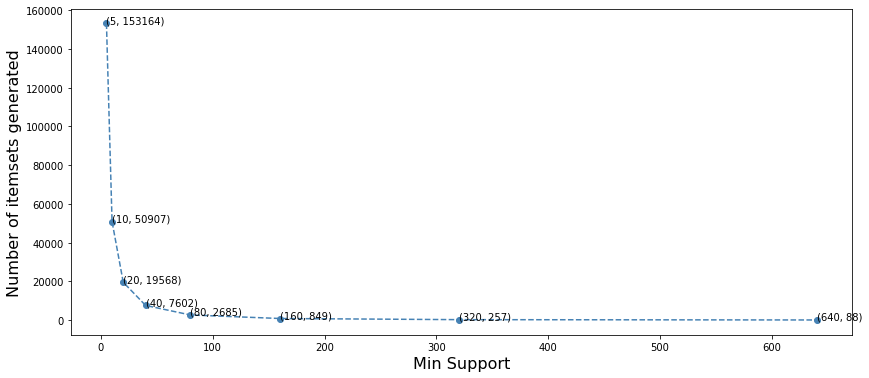

In [30]:
#Plot number of itemsets with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_itemsets_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of itemsets generated", fontsize=16)
for i in range(0,len(num_itemsets_array)):
    plt.text(min_sup_array[i], num_itemsets_array[i],'({}, {})'.format(min_sup_array[i], num_itemsets_array[i]))
plt.show()

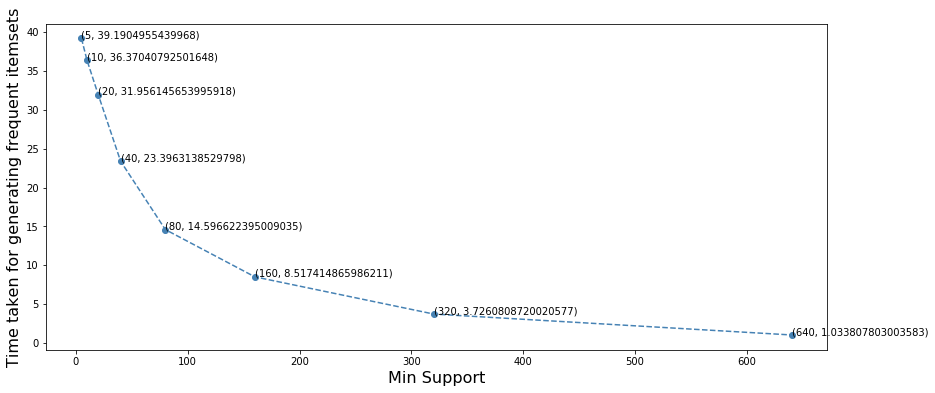

In [31]:
#Plot time taken to find frequent itemsets with respect to MIN_SUP

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, time_taken_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Time taken for generating frequent itemsets", fontsize=16)
for i in range(0,len(time_taken_array)):
    plt.text(min_sup_array[i], time_taken_array[i],'({}, {})'.format(min_sup_array[i], time_taken_array[i]))
plt.show()

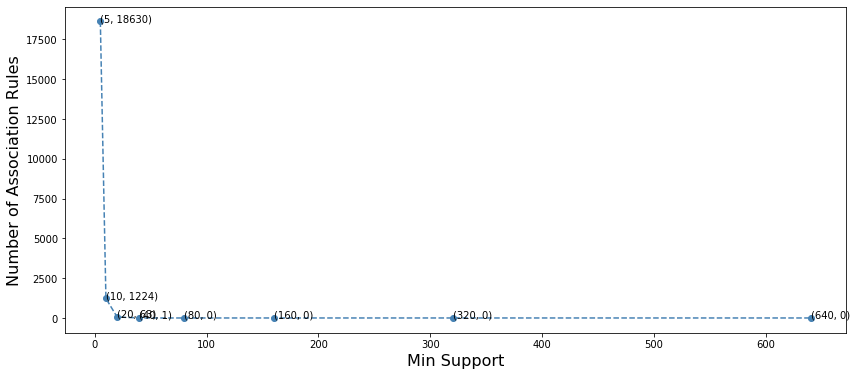

In [32]:
#Plot number of association rules with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(min_sup_array[i], num_association_rules_array[i],'({}, {})'.format(min_sup_array[i], num_association_rules_array[i]))
plt.show()

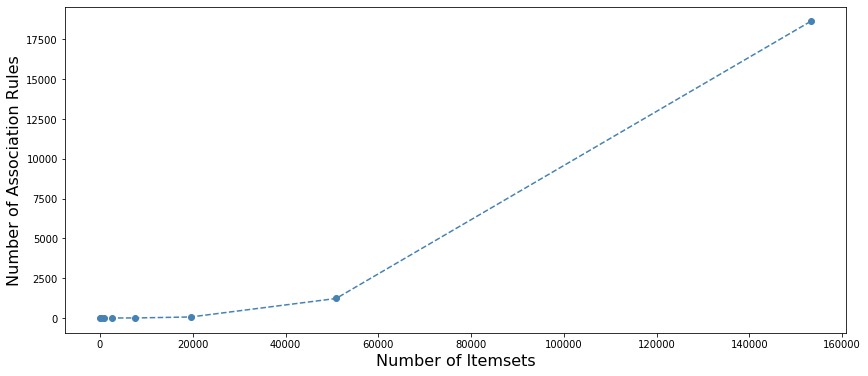

In [33]:
#Plot number of association rules with respect to number of itemsets

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(num_itemsets_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Number of Itemsets", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(num_itemsets_array[i], num_association_rules_array[i],'({}, {})'.format(num_itemsets_array[i], num_association_rules_array[i]))
plt.show()

In [34]:
#Run FP and generate association rules for various different values of MIN_CONF

MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
MIN_SUP = 20
#min_sup_array = [10*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
time_taken_array = []
num_association_rules_array = []
for i in range(len(MIN_CONF_ARRAY)):
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
    start = timeit.default_timer()
    rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF_ARRAY[i])
    stop = timeit.default_timer()
    num_association_rules_array.append(len(rules))
    time_taken_array.append(stop-start)

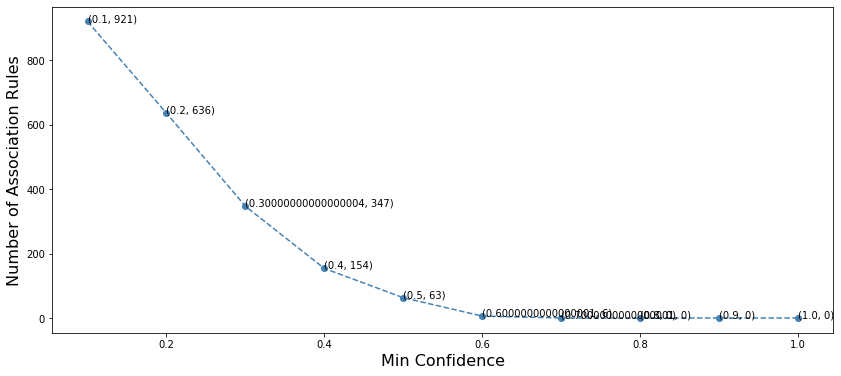

In [35]:
#Plot number of association rules with respect to Confidence Values 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

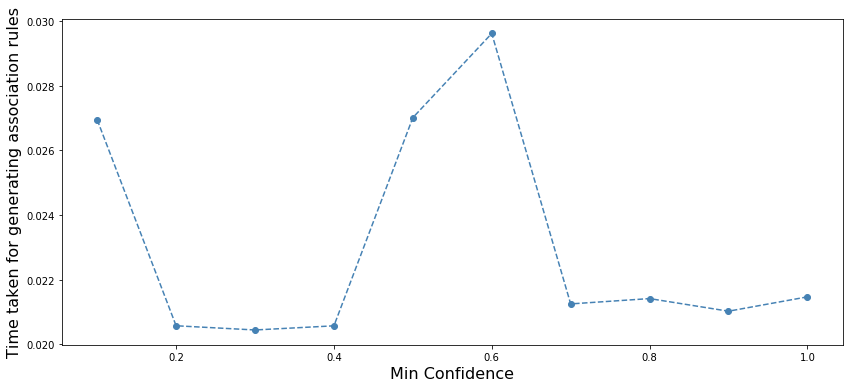

In [36]:
#Plot time taken to generate association rules with respect to MIN_CONF

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, time_taken_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(time_taken_array)):
#     plt.text(MIN_CONF_ARRAY[i], time_taken_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], time_taken_array[i]))
plt.show()

In [ ]:
#Run FP and generate association rules for various different values of MIN_CONF

MAX_NUM = 8
MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
min_sup_array = [10*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
OVERALL_time_taken_array = []
OVERALL_num_association_rules_array = []
for i in range(len(min_sup_array)):
    MIN_SUP = min_sup_array[i]
    time_taken_array = []
    print("Calculating for MIN_SUP = " + str(MIN_SUP))
    num_association_rules_array = []
    for i in range(len(MIN_CONF_ARRAY)):
        patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
        start = timeit.default_timer()
        rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF_ARRAY[i])
        stop = timeit.default_timer()
        num_association_rules_array.append(len(rules))
        time_taken_array.append(stop-start)
        
    OVERALL_time_taken_array.append(time_taken_array)
    OVERALL_num_association_rules_array.append(num_association_rules_array)

Calculating for MIN_SUP = 10
Calculating for MIN_SUP = 20


In [ ]:
#Plot number of association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

for i in range(0,len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_num_association_rules_array[i], linestyle='--', marker='o',label="MIN SUP=" + str(min_sup_array[i]))
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
ax.legend()
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

In [ ]:
#Plot time taken to generate association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

for i in range(len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_time_taken_array[i],linestyle='--', marker='o')
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()